# ❤️ Predicting Heart Disease with Machine Learning

Cardiovascular disease (CVD) is one of the leading causes of death worldwide.  
Early detection and accurate diagnosis can significantly reduce mortality by enabling timely intervention.

In this notebook, we build a machine learning model that can predict the presence of heart disease based on various clinical and lifestyle factors such as:

- Age, gender, blood pressure
- Cholesterol levels
- Chest pain types
- Electrocardiographic results
- And more...

---

### 🧪 Objective:
To develop and evaluate a predictive model that can identify patients at risk of heart disease using supervised learning techniques.

We will:
- Load and explore the dataset
- Preprocess and scale the data
- Train a classification model (Logistic Regression)
- Evaluate its performance using accuracy and confusion matrix
- Visualize results and discuss future improvements

Let’s begin! 👇


## 📦 Importing Essential Libraries

To begin our heart disease data analysis, we first import the essential Python libraries:

- *NumPy*: For numerical operations and handling arrays.
- *Pandas*: For reading and manipulating structured data (DataFrames).
- *Matplotlib*: For basic data visualization.

These tools form the foundation of most data science projects.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 📂 Loading the Heart Disease Dataset

Now that we have our libraries ready, let's load the dataset using **Pandas**.

The dataset is stored in a `.csv` (Comma-Separated Values) file format, which is one of the most common formats for structured data. We use the `read_csv()` function from Pandas to load it.

We assign the resulting **DataFrame** (a 2D table of data) to a variable called `df`, which will be used throughout our analysis.



In [4]:
df = pd.read_csv('heart_disease_data.csv')

## 🔍 Checking for Missing Values

Before diving deeper into data analysis and modeling, it's crucial to check whether our dataset contains any **missing values**.  
Missing data can lead to biased results or cause errors during model training.

We use the Pandas method `isnull().sum()` on our DataFrame `df` to find out:

- Which columns contain `NaN` (missing) values.
- How many missing values exist in each column.


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 🎯 Defining Features (X) and Target Variable (y)

To build a machine learning model, we need to split our dataset into:

- **Features (X)**: The input variables used to make predictions.
- **Target (y)**: The output variable we want to predict.

In our heart disease dataset, the target variable is typically something like `target` or `heart_disease`, which indicates whether a person has heart disease.

We remove the target column from the main DataFrame to form `X`, and store the target column separately in `y`.

In [6]:
x = df.iloc[:, :13].values
y = df.iloc[:, -1].values

## ✂️ Splitting the Dataset into Training and Testing Sets

To evaluate how well our machine learning model will perform on unseen data, we split our dataset into two parts:

- **Training set (X_train, y_train)**: Used to train the model.
- **Testing set (X_test, y_test)**: Used to evaluate the model's performance on new data.

We use the `train_test_split()` function from `sklearn.model_selection` to do this.

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=42)

## ⚖️ Feature Scaling: Standardizing Input Data

In many machine learning algorithms — especially those based on distance metrics or gradient optimization — **feature scaling** plays a critical role in achieving stable and accurate results.

Some models that are particularly sensitive to feature scales include:
- 🔸 Logistic Regression
- 🔸 Support Vector Machines (SVM)
- 🔸 K-Nearest Neighbors (KNN)
- 🔸 Gradient-based models

To bring all features onto a comparable scale, we use **`StandardScaler`** from `sklearn.preprocessing`.  
This method transforms the features so that they have:
- A **mean of 0**
- A **standard deviation of 1**

This ensures that no single feature dominates the learning process due to its scale.


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 🧠 Building a Classification Model: Logistic Regression

With our data preprocessed and scaled, it's time to train a machine learning model to **predict heart disease**.

We'll start with **Logistic Regression**, a fast and interpretable classification algorithm that works well as a baseline model.

---

### 📥 Step 1: Import the Classifier

We import the `LogisticRegression` class from Scikit-learn’s `linear_model` module.

In [9]:
from sklearn.linear_model import LogisticRegression

## 🔧 Model Initialization & Training

Now that we’ve imported our classifier, it’s time to:

1. **Create a model object** – this is an instance of `LogisticRegression`.
2. **Train the model** – using the `.fit()` method with our training data.

---

### 🛠️ Step 1: Initialize the Classifier


In [10]:
regressor = LogisticRegression()
regressor.fit(x_train_scaled, y_train)

LogisticRegression()

## 📊 Model Evaluation: Accuracy & Confusion Matrix

Once our classifier is trained, we need to evaluate how well it performs on unseen test data.

We'll use two common evaluation tools:

1. **Accuracy Score**: Percentage of correctly predicted labels.
2. **Confusion Matrix**: A matrix showing true vs. predicted classifications.

---

### 🔍 Step 1: Make Predictions on the Test Set

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_predict = regressor.predict(x_test_scaled)
accuracy_score_model = accuracy_score(y_test, y_predict)
confusion_matrix_model = confusion_matrix(y_test, y_predict)

print('your accuracy score is : ', accuracy_score_model)
print('your confusion matrix is : \n', confusion_matrix_model)

your accuracy score is :  0.8524590163934426
your confusion matrix is : 
 [[25  4]
 [ 5 27]]


## 📊 Visualizing the Confusion Matrix

While the raw confusion matrix shows the number of correct and incorrect predictions, visualizing it as a heatmap makes the model's performance much easier to interpret.

We’ll use **Seaborn’s `heatmap`** function for this purpose.

---

### 📥 Step 1: Import Seaborn

In [12]:
import seaborn as sns

### 🧊 Step 2: Plot the Confusion Matrix as a Heatmap

Now let’s visualize the confusion matrix we generated earlier using `seaborn.heatmap()`.

This heatmap helps us quickly understand how well the model classified each class.

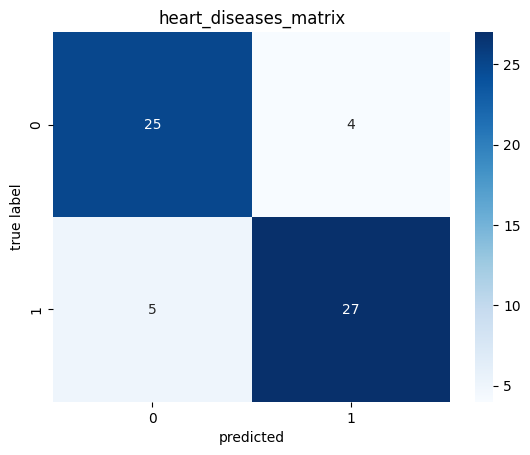

In [13]:
sns.heatmap(confusion_matrix_model, annot= True, fmt='d', cmap = 'Blues')
plt.title('heart_diseases_matrix')
plt.xlabel('predicted')
plt.ylabel('true label')
plt.show()

## ✅ Conclusion

In this notebook, we built a complete machine learning pipeline to predict heart disease using structured clinical data.

We followed these key steps:

1. **Data Loading**: Imported and previewed the dataset using Pandas.
2. **Data Cleaning**: Checked for missing values using `isnull().sum()`.
3. **Feature & Target Definition**: Split the data into `X` (features) and `y` (target).
4. **Train/Test Split**: Divided the dataset into training and testing sets (80/20 split).
5. **Feature Scaling**: Applied `StandardScaler` to normalize the input features.
6. **Model Building**: Trained a `LogisticRegression` model on the training data.
7. **Model Evaluation**:
   - Used `accuracy_score` to assess model performance.
   - Generated a `confusion_matrix` to analyze correct/incorrect classifications.
   - Visualized the matrix using Seaborn’s `heatmap`.

🔍 Our baseline model showed decent performance, making it a good starting point for further optimization.

---

## 🚀 Future Work (Next Steps)

To improve performance and make the model more robust, we can explore:

- 🔁 **Cross-Validation**: Use k-fold cross-validation for more reliable model evaluation.
- 🔍 **Feature Engineering**: Create new features or transform existing ones to reveal deeper patterns.
- 📊 **Model Comparison**: Try more complex classifiers like:
  - `RandomForestClassifier`
  - `GradientBoostingClassifier`
  - `XGBoost`
  - `SVC`
- 🧪 **Hyperparameter Tuning**: Use `GridSearchCV` or `RandomizedSearchCV` to find the best model settings.
- ⚖️ **Class Imbalance Handling**: If classes are imbalanced, consider using:
  - `class_weight='balanced'`
  - **SMOTE** for oversampling the minority class
- 📈 **Precision/Recall/F1 Optimization**: Especially useful if false negatives/positives have different consequences.
- 🧠 **Explainability**: Use tools like SHAP or LIME to interpret the model’s decisions.
- 🌍 **Deployment**: Wrap the trained model in an API (using Flask or FastAPI) and make it available as a real-world service.

---

> Building a solid baseline is the first step — now it's time to iterate, experiment, and go for that 🥇 **Kaggle Gold**!
